<p id="part0"></p>

<p style="font-family: Verdana; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #00008B">Определение эффективности интенсивной технологии выращивания сах.свеклы</p>

<p style="font-family: Verdana; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #00008B">СОДЕРЖАНИЕ</p>
<hr style="height: 0.5px; border: 0; background-color: Gray">

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part1">0 Импорт библиотек</a></p>
<hr style="height: 0.5px; border: 0; background-color: #4682B4">

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part2">1 Загрузка данных</a></p>
<hr style="height: 0.5px; border: 0; background-color: #4682B4">

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part3">2 Первичный анализ данных</a></p>
<hr style="height: 0.5px; border: 0; background-color: #4682B4">

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part4">3 Проверка гипотез по урожайности</a></p>
<hr style="height: 0.5px; border: 0; background-color: #4682B4">

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part5">4 Проверка окупаемости дополнительных затрат</a></p>

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part6">4.1 Загрузка затрат и объединение датасетов</a></p>

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part7">4.2 Проверка гипотезы о себестоимости разных технологий</a></p>

<p style="text-indent: 1vw; font-family: Verdana; font-size: 14px; font-style: normal; font-weight: normal; letter-spacing: 2px; color: #00008B">
<a href="#part8">4.3 Оценка запаса прочности эффективности интенсивной технологии</a></p>

<hr style="height: 0.5px; border: 0; background-color: #4682B4">

<p id="part1"></p>

<p style="font-family: Verdana; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #00008B">0 ИМПОРТ БИБЛИОТЕК</p>
<hr style="height: 0.5px; border: 0; background-color: Gray">

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import mannwhitneyu
from scipy.stats import norm
import numpy as np
from tqdm.auto import tqdm

1. Библиотека pandas потребуется для работы с данными в табличном представлении.
2. Библиотека seaborn потребуется для работы с графиками.
3. Библиотека matplotlib потребуется для работы с графиками.
4. Библиотека scipy потребуется для проверки гипотез.
5. Библиотека tqdm.auto потребуется отображения прогресса выполнения бутстрапа.
4. Библиотека numpy потребуется для выполнения математических операций в статистических методах.

<p id="part2"></p>

<p style="font-family: Verdana; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #00008B">1 ЗАГРУЗКА ДАННЫХ</p>
<hr style="height: 0.5px; border: 0; background-color: Gray">

In [2]:
df = pd.read_excel('Dataset2.xlsx', sheet_name='Лист1', header=1)
df = df[['Регион', 'Код ПУ', 'Культура', 'Площадь поля\n(ГА)', 'Урожайность' ,'Технология']]
df.head(2)

,Регион,Код ПУ,Культура,Площадь поля\n(ГА),Урожайность,Технология
0,Белгород Центр,3155,Сахарная свекла,127.0,425.807874,стандарт
1,Белгород Центр,3155,Сахарная свекла,149.0,421.832215,интенсив


In [3]:
#regions = pd.DataFrame(df['Регион'].unique())
regions = df['Регион'].unique()
regions

array(['Белгород Центр', 'Белгород Юг', 'Белгород-Курск', 'Орел',
       'Тамбов'], dtype=object)

В представленном датафрейме содержится информация по урожайности сахарной свеклы в 5 регионах предприятия в 2020 году.
В настоящее время применяется 2 технологии: стандарт и интенсив.  
<strong>Наша задача состоит в том, чтобы определить, является ли интенсивная технология выгодной и дать рекомендации по ее применению</strong>

<p id="part3"></p>

<p style="font-family: Verdana; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #00008B">2 ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ</p>
<hr style="height: 0.5px; border: 0; background-color: Gray">

Мы знаем, что все поля заполнены и выбросов нет, т.к. все значения фактические.  
Поэтому проверять набор данных на пропуски и выбросы не будем.

**Поизучаем данные в разрезе регионов**

In [4]:
print('\033[1m' +'описание основнох статистик' + '\033[0m')

for region in regions:
    df_region = df[df['Регион'] == region] 
    print('\033[1m' + region + '\033[0m')
    print(df_region[['Площадь поля\n(ГА)', 'Урожайность']].describe())
    print('--------------------------------------') 

описание основнох статистик
Белгород Центр
       Площадь поля\n(ГА)  Урожайность
count          129.000000   129.000000
mean           118.274186   323.998367
std             65.573292    87.458849
min             11.480000   117.071153
25%             70.100000   259.285130
50%            107.590000   327.778404
75%            151.000000   385.042688
max            365.320000   581.641929
--------------------------------------
Белгород Юг
       Площадь поля\n(ГА)  Урожайность
count          103.000000   103.000000
mean           101.113398   316.005595
std             55.205285    60.507763
min             15.000000   140.453846
25%             65.300000   281.768844
50%             88.000000   316.465000
75%            113.500000   360.558460
max            373.000000   481.808108
--------------------------------------
Белгород-Курск
       Площадь поля\n(ГА)  Урожайность
count          127.000000   127.000000
mean           123.708661   442.087138
std             54.632298   104.4

Для каждого региона определим размер выборки, среднюю урожайность по технологиям.  
Построим графики распределения урожайности для интенсивной и стандартной технологий, и при помощи теста Шапиро-Уилка проверим их на нормальность распределения. 

Белгород Центр
полей интенсив 32
полей стандарт 97
средняя урожайность интенсив: 317.1410832868302
средняя урожайность стандарт: 326.2605633379498


гипотеза – данные по стандарту распределены нормально: Statistics=0.986, p-value=0.377
Принять гипотезу о нормальности стандарта
гипотеза – данные по интенсиву распределены нормально: Statistics=0.981, p-value=0.835
Принять гипотезу о нормальности интенсива


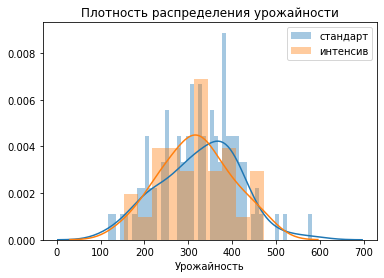

Белгород Юг
полей интенсив 0
полей стандарт 103
средняя урожайность интенсив: nan
средняя урожайность стандарт: 316.005595181724


гипотеза – данные по стандарту распределены нормально: Statistics=0.989, p-value=0.572
Принять гипотезу о нормальности стандарта
**по интенсиву нет данных**


C:\Users\Dmitry\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Dmitry\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Dmitry\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


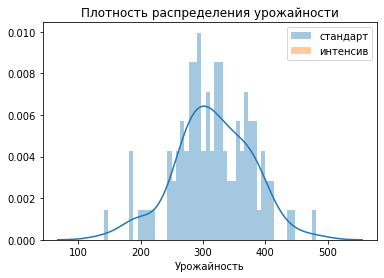

Белгород-Курск
полей интенсив 39
полей стандарт 88
средняя урожайность интенсив: 424.2029736576615
средняя урожайность стандарт: 450.0130742864169


гипотеза – данные по стандарту распределены нормально: Statistics=0.975, p-value=0.088
Принять гипотезу о нормальности стандарта
гипотеза – данные по интенсиву распределены нормально: Statistics=0.955, p-value=0.118
Принять гипотезу о нормальности интенсива


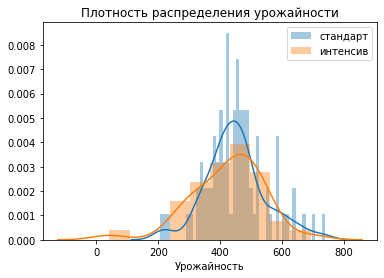

Орел
полей интенсив 14
полей стандарт 48
средняя урожайность интенсив: 439.0575173577843
средняя урожайность стандарт: 378.6644091793376


гипотеза – данные по стандарту распределены нормально: Statistics=0.924, p-value=0.004
Отклонить гипотезу о нормальности стандарта
гипотеза – данные по интенсиву распределены нормально: Statistics=0.953, p-value=0.612
Принять гипотезу о нормальности интенсива


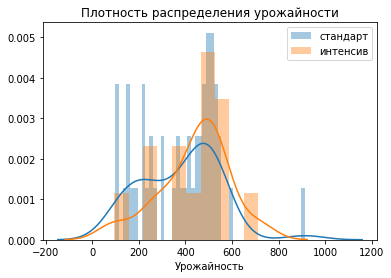

Тамбов
полей интенсив 32
полей стандарт 227
средняя урожайность интенсив: 390.56194950178156
средняя урожайность стандарт: 337.1885381545866


гипотеза – данные по стандарту распределены нормально: Statistics=0.964, p-value=0.000
Отклонить гипотезу о нормальности стандарта
гипотеза – данные по интенсиву распределены нормально: Statistics=0.972, p-value=0.550
Принять гипотезу о нормальности интенсива


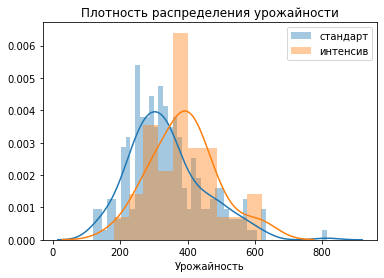

In [5]:
for region in regions:
    df_i = df[(df['Технология'] == 'интенсив') & (df['Регион'] == region)]
    df_s = df[(df['Технология'] == 'стандарт') & (df['Регион'] == region)]
    
    print('\033[1m' + region + '\033[0m')
    print('полей интенсив', len(df_i))
    print('полей стандарт', len(df_s))
    print('средняя урожайность интенсив:', df_i['Урожайность'].mean())
    print('средняя урожайность стандарт:', df_s['Урожайность'].mean())
    print('\n')
    
    stat, p = scipy.stats.shapiro(df_s['Урожайность']) # тест Шапиро-Уилксона на нормальность распределения
    print('гипотеза – данные по стандарту распределены нормально: Statistics=%.3f, p-value=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности стандарта')
    else:
        print('Отклонить гипотезу о нормальности стандарта')
        
    while True:
        try:    
            stat, p = scipy.stats.shapiro(df_i['Урожайность'])
            print('гипотеза – данные по интенсиву распределены нормально: Statistics=%.3f, p-value=%.3f' % (stat, p))
            alpha = 0.05
            if p > alpha:
                print('Принять гипотезу о нормальности интенсива')
            else:
                print('Отклонить гипотезу о нормальности интенсива')
            break
        except ValueError:
            print('**по интенсиву нет данных**')
            break
        
    sns.distplot(df_s['Урожайность'], 50)
    sns.distplot(df_i['Урожайность'], 10)
    plt.title('Плотность распределения урожайности')
    plt.legend(['стандарт', 'интенсив'])
    plt.show()

Видим, что интенсив отсутствует в зоне Белгород-Юг и не во всех регионах урожайность по интенсивной технологии выше стандарта.  
Также, по части регионов распределение урожайности ненормальное, выборки небольшие.

Проверим на сколько значима разница в урожайности.  
Анализ будем проводить на уровне производственного отделения, как наименьшей обобщающей группировки с однородными полями с группировкой по регионам.  
Посмотрим на графиках средние урожайности.

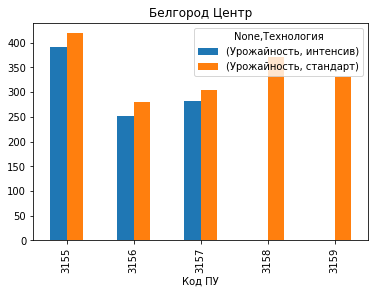

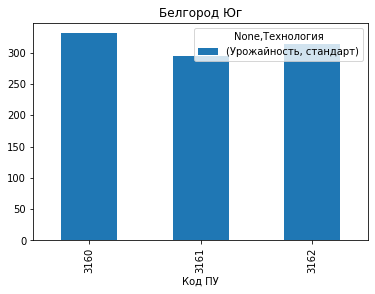

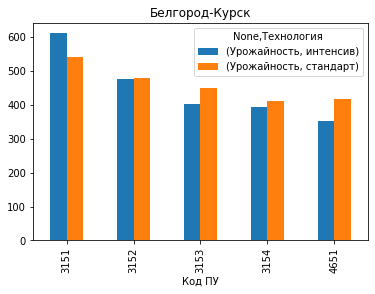

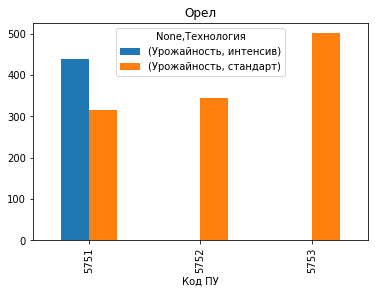

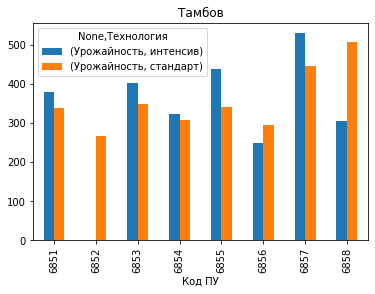

In [6]:
for region in regions:
    df_region_plot = df[df['Регион'] == region].groupby(['Код ПУ', 'Технология']).mean()[['Урожайность']].unstack()
    df_region_plot.plot(kind='bar', title=region)

**для более детального изучения урожайности, создадим отдельный датасет, с возможностью выбора регина**

In [7]:
i = 0
df_region = df[df['Регион'] == regions[i]]
df_region.head(2)

,Регион,Код ПУ,Культура,Площадь поля\n(ГА),Урожайность,Технология
0,Белгород Центр,3155,Сахарная свекла,127.0,425.807874,стандарт
1,Белгород Центр,3155,Сахарная свекла,149.0,421.832215,интенсив


In [8]:
df_region_group = df_region.groupby(['Код ПУ', 'Технология']).agg({'Код ПУ': 'count', 'Урожайность': {'mean', 'median'}}).reset_index()
#df_region_group = df_region_group.rename({'Код поля': 'Количество полей', 'Урожайность': 'Средняя Урожайность'}, axis=1).style.bar('Средняя Урожайность')
df_region_group.style.bar('Урожайность')

В части ПУ выборка с интенсивной технологией очень мала. Отбросим их из анализа.

In [9]:
min_ratio_tech = 0.15
    
df_region_ratio_tech = df.pivot_table(index = ['Код ПУ'], columns = 'Технология', values = 'Культура', aggfunc = 'count', fill_value = 0).reset_index()
#добавление столбца с долей интенсива в ПУ
df_region_ratio_tech['Доля интенсива'] = df_region_ratio_tech['интенсив'] / df_region_ratio_tech['стандарт']
# фильтр по доли
df_region_ratio_tech = df_region_ratio_tech[df_region_ratio_tech['Доля интенсива'] < min_ratio_tech ]
# оставляем только столбец с кодами ПУ
region_ratio_tech = df_region_ratio_tech['Код ПУ']
#region_ratio_tech

удаляем ПУ, где доля интенсива мала

In [10]:
df_region_filter = df.loc[~df['Код ПУ'].isin(region_ratio_tech)] # удаляем ПУ, где доля интенсива мала

Оставшиеся ПУ

In [11]:
filter_area = df_region_filter['Код ПУ'].unique()
filter_area

array([3155, 3156, 3157, 3151, 3152, 3153, 3154, 4651, 5751, 6851, 6854,
       6855, 6857], dtype=int64)

<p id="part4"></p>

<p style="font-family: Verdana; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #00008B">3 ПРОВЕРКА ГИПОТЕЗ ПО УРОЖАЙНОСТИ</p>
<hr style="height: 0.5px; border: 0; background-color: Gray">

Изучамые выборки небольшие и их распредедние не везде является нормальным, поэтому для проверки гипотезы об отсутствии разности урожайности при интенсивной и стандартной технологиях воспользуемся <strong>тестом Манна Уитни</strong> и <strong>Бутстрапом</strong>, основанном на многократной генерации выборок методом Монте-Карло на базе имеющейся выборки.

In [12]:
for area in region_ratio_tech:
    print(f'{area}: недостаточно данных для анализа')
print('\n')

alpha = 0.05
print('\033[1m' + 'критерий Манна-Уитни'  + '\033[0m \n')
for area in filter_area:
    df_region_filter_area_i = df_region_filter[(df_region_filter['Технология'] == 'интенсив') & 
                                               (df_region_filter['Код ПУ'] == area)]
    df_region_filter_area_s = df_region_filter[(df_region_filter['Технология'] == 'стандарт') & 
                                               (df_region_filter['Код ПУ'] == area)]
    result_mw_area = mannwhitneyu(df_region_filter_area_i['Урожайность'], df_region_filter_area_s['Урожайность'])
    if result_mw_area.pvalue < alpha and result_mw_area.statistic > 0:
        print(f'{area}: урожайность по технологиям различается. statistic - {result_mw_area.statistic} pvalue - {round(result_mw_area.pvalue, 5)}')
    else:
        print(f'{area}: урожайность по технологиям не различается. statistic - {result_mw_area.statistic} pvalue - {round(result_mw_area.pvalue, 5)}')

print('\n')       
print('\033[1m' + 'Бутстрап' + '\033[0m')
filter_area2 = []
for area in tqdm(filter_area):
    means = [] 
    for i in range(3000):
        standart = df_region_filter[(df_region_filter['Технология'] == 'стандарт') & 
                                    (df_region_filter['Код ПУ'] == area)].sample(frac=1, replace=True).Урожайность.mean()
        intensive = df_region_filter[(df_region_filter['Технология'] == 'интенсив') & 
                                     (df_region_filter['Код ПУ'] == area)].sample(frac=1, replace=True).Урожайность.mean()
        means.append(intensive - standart)
#расчет доверительного интервала
    pd_means = pd.DataFrame(means)
    confidence_interval = pd_means.quantile([0.025, 0.975])
#расчет p_value
    p_1 = norm.cdf(x = 0, loc = np.mean(means), scale = np.std(means))
    p_2 = norm.cdf(x = 0, loc = -np.mean(means), scale = np.std(means))
    p_value = min(p_1, p_2) * 2
    if p_value < alpha and list(confidence_interval[0])[0] > 0:
        filter_area2.append(area)
        print(f'{area}: урожайность интенсива выше стандарта. pvalue - {round(p_value, 5)}, доверительный интервал {[round(v,2) for v in confidence_interval[0].tolist()]}')
    elif p_value < alpha and list(confidence_interval[0])[0] < 0:      
        print(f'{area}: урожайность интенсива ниже стандарта. pvalue - {round(p_value, 5)}, доверительный интервал {[round(v,2) for v in confidence_interval[0].tolist()]}')
    else:
        print(f'{area}: урожайность по технологиям не различается. pvalue - {round(p_value, 5)}, доверительный интервал {[round(v,2) for v in confidence_interval[0].tolist()]}')

3158: недостаточно данных для анализа
3159: недостаточно данных для анализа
3160: недостаточно данных для анализа
3161: недостаточно данных для анализа
3162: недостаточно данных для анализа
5752: недостаточно данных для анализа
5753: недостаточно данных для анализа
6852: недостаточно данных для анализа
6853: недостаточно данных для анализа
6856: недостаточно данных для анализа
6858: недостаточно данных для анализа


критерий Манна-Уитни 

3155: урожайность по технологиям не различается. statistic - 36.0 pvalue - 0.18747
3156: урожайность по технологиям не различается. statistic - 81.0 pvalue - 0.24788
3157: урожайность по технологиям не различается. statistic - 40.0 pvalue - 0.26299
3151: урожайность по технологиям не различается. statistic - 9.0 pvalue - 0.17627
3152: урожайность по технологиям не различается. statistic - 96.0 pvalue - 0.35973
3153: урожайность по технологиям не различается. statistic - 72.0 pvalue - 0.4027
3154: урожайность по технологиям не различается. statistic - 

3155: урожайность по технологиям не различается. pvalue - 0.17689, доверительный интервал [-68.86, 11.13]
3156: урожайность по технологиям не различается. pvalue - 0.2632, доверительный интервал [-82.94, 20.4]
3157: урожайность по технологиям не различается. pvalue - 0.41956, доверительный интервал [-74.41, 31.64]
3151: урожайность по технологиям не различается. pvalue - 0.15056, доверительный интервал [-23.16, 160.97]
3152: урожайность по технологиям не различается. pvalue - 0.89334, доверительный интервал [-64.72, 51.39]
3153: урожайность по технологиям не различается. pvalue - 0.27791, доверительный интервал [-139.82, 30.24]
3154: урожайность по технологиям не различается. pvalue - 0.65856, доверительный интервал [-102.27, 58.88]
4651: урожайность интенсива ниже стандарта. pvalue - 0.00747, доверительный интервал [-115.76, -18.74]
5751: урожайность интенсива выше стандарта. pvalue - 0.03169, доверительный интервал [8.85, 230.82]
6851: урожайность по технологиям не различается. pvalu

**В 11 производственных отделения данных для анализа слишком мало.  
По остальным ПУ оба теста показали схожие результаты:  
В 9 производственных отделениях разницы в урожайности нет.  
В 3 производственных отделениях урожайность при интенсивной технологии выше.  
В ПУ 4651 урожайность при интенсивной технологии ниже обычной, что может говорить о несоблюдении технологии**

<p id="part5"></p>

<p style="font-family: Verdana; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #00008B">4 ПРОВЕРКА ОКУПАЕМОСТИ ДОПОЛНИТЕЛЬНЫХ ЗАТРАТ</p>
<hr style="height: 0.5px; border: 0; background-color: Gray">

<p id="part6"></p>

<p style="font-family: Verdana; font-size: 14px; font-style: normal; letter-spacing: 3px; color: #00008B">4.1 Загрузка затрат и объединение</p>

Мы знаем, что интенсивная технология требует больше удобрений и количества тех.операций, что делает ее более дорогой. Поэтому, в ПУ, где урожайность не отличается или ниже стандарта, эффект отрицательный. Предприятие несет убытки.  
<strong>Проверим, в каких ПУ есть положительный экономический эффект.</strong>

Загрузим информацию по стоимости технологий.

In [13]:
df_costs = pd.read_excel('Dataset2.xlsx', sheet_name='Лист4', header=1)
df_costs = df_costs[['Регион', 'Технология', 'Затраты, руб/га']]
df_costs

,Регион,Технология,"Затраты, руб/га"
0,Белгород Центр,стандарт,30234.435975
1,Белгород Центр,интенсив,33234.435975
2,Белгород Юг,стандарт,31514.240646
3,Белгород Юг,интенсив,34614.240646
4,Белгород-Курск,стандарт,33519.541284
5,Белгород-Курск,интенсив,36719.541284
6,Орел,стандарт,27072.603447
7,Орел,интенсив,29872.603447
8,Тамбов,стандарт,31700.606954
9,Тамбов,интенсив,34800.606954


Дальнейший анализ окупаемости затрат будем проводить только для ПУ с различной продуктивностью технологий.  
Добавим к датафрейму по урожайности затраты.

In [14]:
df_region_filter_2 = df_region_filter.loc[df['Код ПУ'].isin(filter_area2)]
df_region_filter_costs = df_region_filter_2.merge(df_costs, how='left', 
                                                left_on=['Регион', 'Технология'], 
                                                right_on=['Регион', 'Технология'])
df_region_filter_costs['Затраты, руб/тн'] = df_region_filter_costs['Затраты, руб/га'] / df_region_filter_costs['Урожайность'] * 10
df_region_filter_costs.head(2)

,Регион,Код ПУ,Культура,Площадь поля\n(ГА),Урожайность,Технология,"Затраты, руб/га","Затраты, руб/тн"
0,Орел,5751,Сахарная свекла,6.0,543.733333,стандарт,27072.603447,497.902221
1,Орел,5751,Сахарная свекла,133.0,534.654135,стандарт,27072.603447,506.357319


Оценим на графиках разность стоимости технологий.

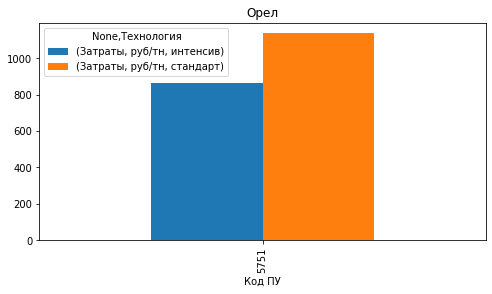

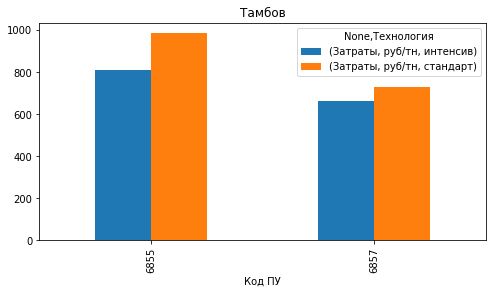

In [15]:
regions_cost = df_region_filter_costs['Регион'].unique()

for region_ in regions_cost:
    df_region_filter_costs_plot = df_region_filter_costs[df_region_filter_costs['Регион'] == region_].groupby(['Код ПУ', 'Технология']).mean()[['Затраты, руб/тн']].unstack()
    df_region_filter_costs_plot.plot(kind='bar', title=region_, figsize=(8, 4))

<p id="part7"></p>

<p style="font-family: Verdana; font-size: 14px; font-style: normal; letter-spacing: 3px; color: #00008B">4.2 Проверка гипотезы о себестоимости разных технологий</p>

In [16]:
filter_area3 = []

print('\033[1m' + 'критерий Манна-Уитни'  + '\033[0m \n')
for area in filter_area2:
    intensive_mw = df_region_filter_costs[(df_region_filter_costs['Технология'] == 'интенсив') & 
                                          (df_region_filter_costs['Код ПУ'] == area)]
    standart_mw = df_region_filter_costs[(df_region_filter_costs['Технология'] == 'стандарт') & 
                                         (df_region_filter_costs['Код ПУ'] == area)]
    result_mw_costs = mannwhitneyu(intensive_mw['Затраты, руб/тн'], standart_mw['Затраты, руб/тн'])
    if result_mw_costs.pvalue < alpha:
        print(f'{area}: затраты на 1 тн различаются. pvalue {round(result_mw_costs.pvalue, 5)}')
    else:
        print(f'{area}: различия затрат на 1 тн стат. незначимы. pvalue {round(result_mw_costs.pvalue, 5)}')

print('\033[1m' + 'Бутстрап' + '\033[0m')
for area in tqdm(filter_area2):
    means_costs = []
    for i in range(3000):
        standart = df_region_filter_costs[(df_region_filter_costs['Технология'] == 'стандарт') & 
                                          (df_region_filter_costs['Код ПУ'] == area)].sample(frac=1, replace=True)['Затраты, руб/тн'].mean()
        intensive = df_region_filter_costs[(df_region_filter_costs['Технология'] == 'интенсив') & 
                                           (df_region_filter_costs['Код ПУ'] == area)].sample(frac=1, replace=True)['Затраты, руб/тн'].mean()
        means_costs.append(intensive - standart)
#расчет доверительного интервала
    pd_means_costs = pd.DataFrame(means_costs)
    confidence_interval_costs = pd_means_costs.quantile([0.025, 0.975])
#расчет p_value
    p_1_costs = norm.cdf(x = 0, loc = np.mean(means_costs), scale = np.std(means_costs))
    p_2_costs = norm.cdf(x = 0, loc = -np.mean(means_costs), scale = np.std(means_costs))
    p_value_costs = min(p_1_costs, p_2_costs) * 2
    if p_value_costs < alpha and confidence_interval_costs[0].tolist()[0] < 0:
        filter_area3.append(area) # добавление ПУ, удовлетворяющих условию окупаемости интенсива
        print(f'{area}: при интенсиве себестоимость ниже. pvalue - {round(p_value_costs, 5)}, доверительный интервал {[round(v,2) for v in confidence_interval_costs[0].tolist()]}')
    elif p_value_costs < alpha and confidence_interval_costs[0].tolist()[0] > 0:
        print(f'{area}: при интенсиве себестоимость выше. pvalue - {round(p_value_costs, 5)}, доверительный интервал {[round(v,2) for v in confidence_interval_costs[0].tolist()]}')
    else:
        print(f'{area}: себестоимость значимо не отличается. pvalue - {round(p_value_costs, 5)}, доверительный интервал {[round(v,2) for v in confidence_interval_costs[0].tolist()]}')

критерий Манна-Уитни 

5751: различия затрат на 1 тн стат. незначимы. pvalue 0.16161
6855: затраты на 1 тн различаются. pvalue 0.01356
6857: различия затрат на 1 тн стат. незначимы. pvalue 0.16347
Бутстрап


5751: себестоимость значимо не отличается. pvalue - 0.2673, доверительный интервал [-712.83, 220.91]
6855: при интенсиве себестоимость ниже. pvalue - 0.01055, доверительный интервал [-312.78, -42.65]
6857: себестоимость значимо не отличается. pvalue - 0.14087, доверительный интервал [-157.03, 15.83]



**Оба теста показали одинаковый результат**:  
   **- в 2-х ПУ нет различий в себестоимости 1 тн. В таком случае использовать интенсивную технологию нецелесообразно, т.к. выше риск понести убытки**.  
    **- Только в ПУ 6855 интенсивная технология оправдала себя.**

<p id="part8"></p>

<p style="font-family: Verdana; font-size: 14px; font-style: normal; letter-spacing: 3px; color: #00008B">4.3 Оценка запаса прочности эффективности интенсивной технологии</p>

In [17]:
for area3 in filter_area3:
    df_ss_area = df_region_filter_costs[df_region_filter_costs['Код ПУ'] == area3]
    # добавление столбцов - возникает предупреждение
    df_ss_area['Валовой сбор тн'] = df_ss_area['Площадь поля\n(ГА)'] * df_ss_area['Урожайность'] / 10
    df_ss_area['Всего затрат'] = df_ss_area['Валовой сбор тн'] * df_ss_area['Затраты, руб/тн']
    # группировка для усреднения результатов по ПУ
    df_ss_area_group = df_ss_area.groupby(['Код ПУ', 'Технология']).sum()[['Площадь поля\n(ГА)', 'Валовой сбор тн', 'Всего затрат']].reset_index()
    df_ss_area_group['Урожайность'] = df_ss_area_group['Валовой сбор тн'] / df_ss_area_group['Площадь поля\n(ГА)'] * 10
    df_ss_area_group['Затраты на тн'] = df_ss_area_group['Всего затрат'] / df_ss_area_group['Валовой сбор тн']
    df_ss_area_group['Затраты на га'] = df_ss_area_group['Всего затрат'] / df_ss_area_group['Площадь поля\n(ГА)']
    
    # фактические затраты на га при интенсивной технологии
    fact_cost_ha_i = df_ss_area_group[df_ss_area_group['Технология'] == 'интенсив']['Затраты на га'].sum() # .sum() для перевода типа series в число
    # фактические затраты на тонну при стандартной технологии
    fact_cost_t_st = df_ss_area_group[df_ss_area_group['Технология'] == 'стандарт']['Затраты на тн'].sum()
    # фактические урожайность при интенсивной технологии
    fact_crop_i = df_ss_area_group[df_ss_area_group['Технология'] == 'интенсив']['Урожайность'].sum()
    #прогноз затрат на 1 тн (на сколько можно изменить затраты для равенства технологий)
    prognoz_cost_i = fact_crop_i * fact_cost_t_st / 10
    #прогноз интенсивной урожайности (на сколько изменить урожайность для равенства сс по технологиям)
    prognoz_crop_i = fact_cost_ha_i / fact_cost_t_st * 10

    print(f'\033[1m {area3}: на сколько можно изменить затраты на 1 га для равенства сс 1 тн по технологиям: \033[0m \n \
    фактические затраты на га: {round(fact_cost_ha_i, 0)} руб.\n \
    максимально возможные затраты на га: {round(prognoz_cost_i, 0)} руб.\n \
    запас прочности на га: {round(prognoz_cost_i, 0) - round(fact_cost_ha_i, 0)} руб.')
    print(f'\033[1m {area3}: изменение урожайности интенсива для уравнения себестоимости 1 тн при текущих затратах на га: \033[0m \n \
    фактическая урожайность интенсива: {round(fact_crop_i, 0)} ц/га \n \
    минимально возможная урожайность интенсива: {round(prognoz_crop_i, 0)} ц/га\n \
    запас прочности по урожайности: {round(fact_crop_i, 0) - round(prognoz_crop_i, 0)} ц/га\n')

 6855: на сколько можно изменить затраты на 1 га для равенства сс 1 тн по технологиям:  
     фактические затраты на га: 34801.0 руб.
     максимально возможные затраты на га: 40655.0 руб.
     запас прочности на га: 5854.0 руб.
 6855: изменение урожайности интенсива для уравнения себестоимости 1 тн при текущих затратах на га:  
     фактическая урожайность интенсива: 444.0 ц/га 
     минимально возможная урожайность интенсива: 380.0 ц/га
     запас прочности по урожайности: 64.0 ц/га



C:\Users\Dmitry\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dmitry\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<a href="#part0"><img src="https://cdn1.savepice.ru/uploads/2021/1/17/1b3a44a6551be87b14e3284d46165b34-full.png" width="50" height="50" align="right"></a>

черновик

горячие клавиши
https://habr.com/ru/post/483408/

df_regions_effect = df_region_filter.loc[df['Код ПУ'].isin(filter_area3)]
regions_effect = df_regions_effect['Регион'].unique()
regions_effect

d = pd.concat([df_ss_area_group, df_ss_area_group], ignore_index=True)
d

https://legkovopros.ru/questions/25349/dublirovat-stroki-v-dataframe-na-osnove-znacheniya-stolbcza-duplicate

df_repeat = df_ss_area_group
df_repeat['Повторы'] = df_repeat['Площадь поля\n(ГА)'].round().astype('int')
df_repeat = df_repeat[['Урожайность', 'Повторы']]
pd.DataFrame(np.repeat(df_repeat.values, df_repeat['Повторы'].values, axis=0), columns=['Урожайность', 'Повторы'])

https://askdev.ru/q/kak-dobavit-stroki-v-freym-dannyh-pandas-v-cikle-for-101739/
https://fooobar.com/questions/1667947/how-to-build-and-fill-pandas-dataframe-from-for-loop

https://python-school.ru/python-for-statissticians/

http://espressocode.top/python-creating-a-pandas-dataframe-column-based-on-a-given-condition/